In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

from numpy.polynomial.polynomial import Polynomial

from functions import open_input_file

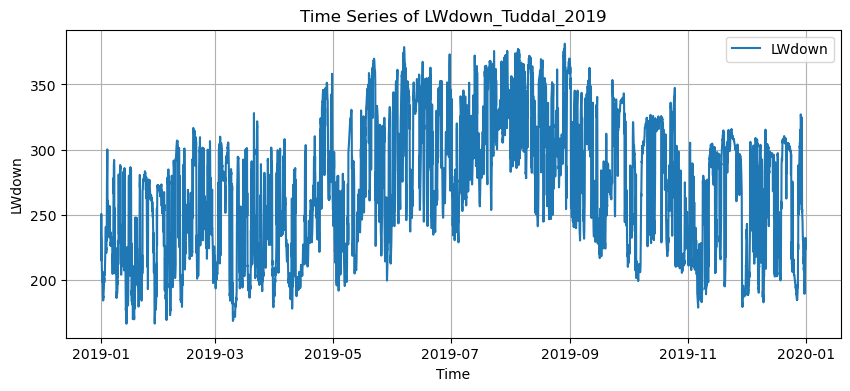

In [47]:
df = open_input_file("LWdown")

plt.figure(figsize=(10, 4))
plt.plot(df.index, df[df.columns[2]], label=df.columns[2])  # Assuming a single variable in the CSV file
plt.title("Time Series of LWdown_Tuddal_2019")
plt.xlabel("Time")
plt.ylabel(df.columns[2])
plt.grid()
plt.legend()
plt.show()

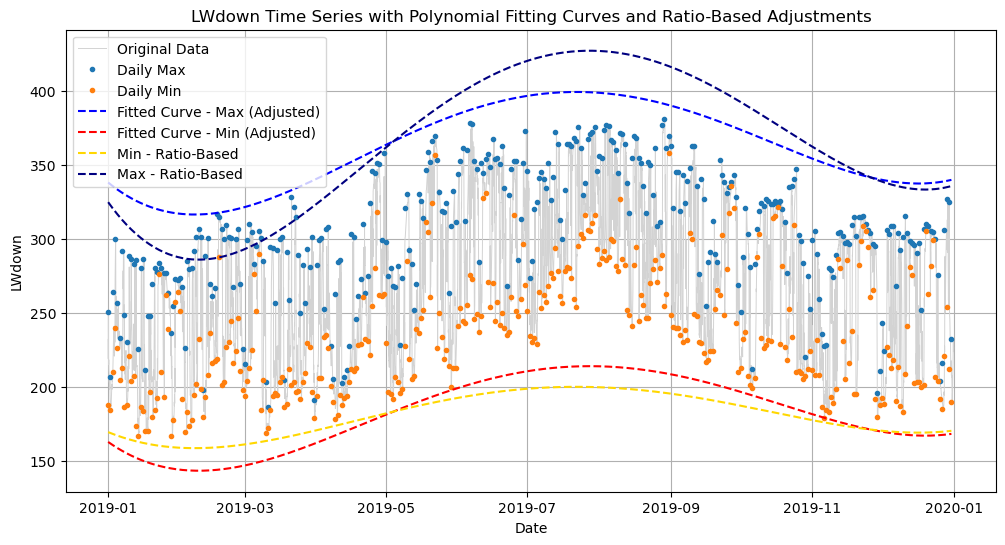

In [49]:
# Resample data to daily max and min values
daily_max = df.resample('D').max().interpolate()
daily_min = df.resample('D').min().interpolate()

# Prepare the x data as day numbers for fitting
x_data = np.arange(len(daily_max))

# Fit a 5th-degree polynomial to the max and min data
poly_max = Polynomial.fit(x_data, daily_max['LWdown'], 4)  # 5th degree polynomial for max
poly_min = Polynomial.fit(x_data, daily_min['LWdown'], 4)  # 5th degree polynomial for min

# Generate fitted values
fitted_max = poly_max(x_data)
fitted_min = poly_min(x_data)

# Adjust the fitted curves by an offset
fitted_max_adjusted = fitted_max + 55
fitted_min_adjusted = fitted_min - 55

# Calculate the ratio between max and min
ratio = np.mean(fitted_max_adjusted / fitted_min_adjusted)

# Create additional ratio-based curves
LWclear = fitted_max_adjusted
LWcloudy = fitted_max_adjusted / ratio

# Plot the original data and the fitting curves
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LWdown'], label="Original Data", color="lightgray", linewidth=0.7)
plt.plot(daily_max.index, daily_max['LWdown'], 'o', label="Daily Max", markersize=3)
plt.plot(daily_min.index, daily_min['LWdown'], 'o', label="Daily Min", markersize=3)
plt.plot(daily_max.index, fitted_max_adjusted, label="Fitted Curve - Max (Adjusted)", color="blue", linestyle="--")
plt.plot(daily_min.index, fitted_min_adjusted, label="Fitted Curve - Min (Adjusted)", color="red", linestyle="--")
plt.plot(daily_max.index, LWcloudy, label="Min - Ratio-Based", color="gold", linestyle="--")
plt.plot(daily_min.index, fitted_min_adjusted * ratio, label="Max - Ratio-Based", color="navy", linestyle="--")

# Add labels and legend
plt.title("LWdown Time Series with Polynomial Fitting Curves and Ratio-Based Adjustments")
plt.xlabel("Date")
plt.ylabel("LWdown")
plt.legend()
plt.grid()
plt.show()


1.7647596890992945


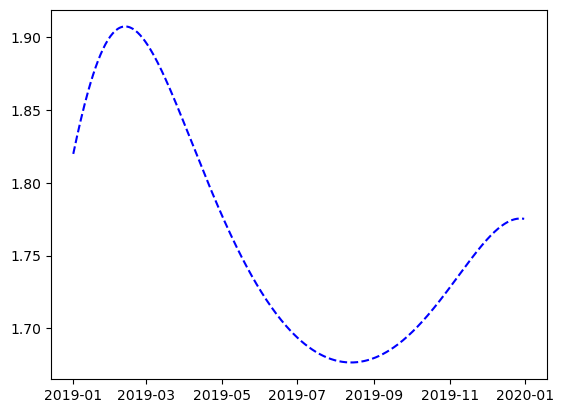

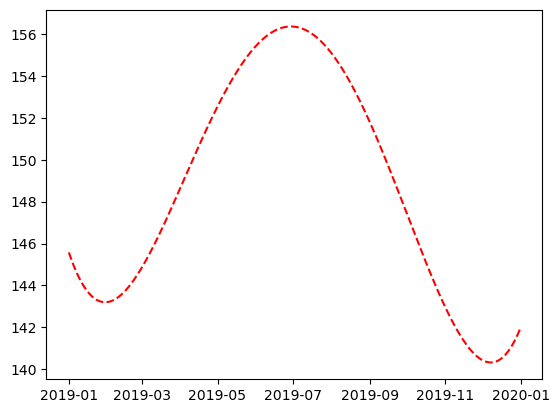

In [51]:
plt.plot(daily_max.index, (fitted_max+40)/(fitted_min-40), label="Ratio", color="blue", linestyle="--")
print(np.mean(((fitted_max+40)/(fitted_min-40))))
plt.show()
plt.plot(daily_max.index, (fitted_max+40)-(fitted_min-40), label="difference", color="red", linestyle="--")

Cloud Fraction successfully saved in data/synthetic_dataset.


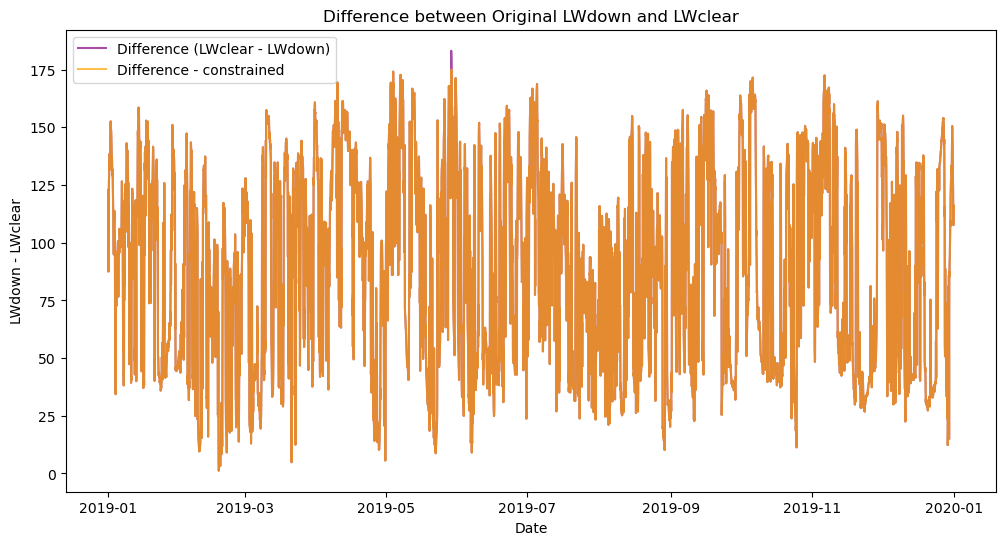

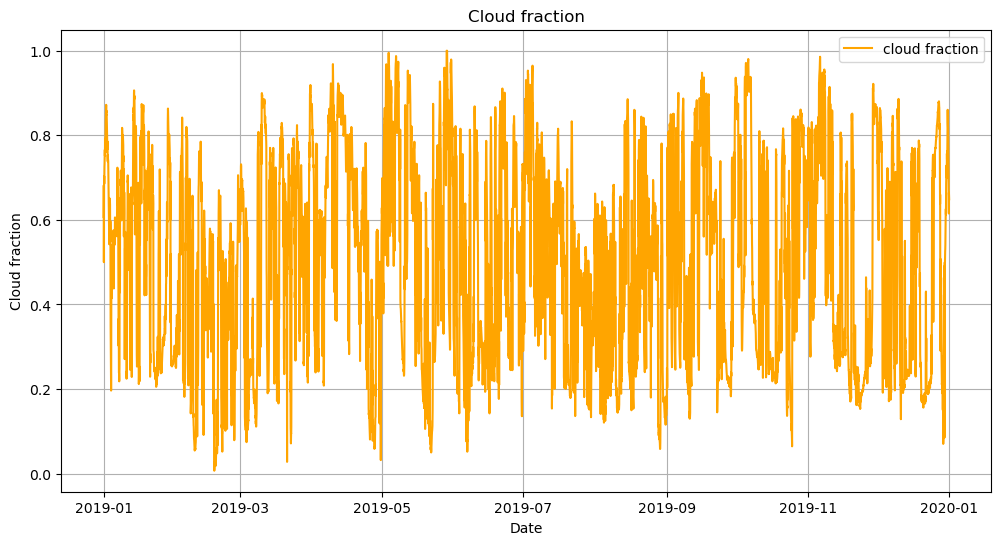

In [55]:
cutoff_value = 175

LWclear_aligned = pd.Series(LWclear, index=daily_max.index).reindex(df.index, method='nearest')

# Calculate the difference between the original data and LWclear
difference = LWclear_aligned - df['LWdown']
difference_constrained = np.clip(difference, 0, cutoff_value)

cloud_fraction_df = cloud_fraction.to_frame(name="Cloud Fraction")

# Plot the difference
plt.figure(figsize=(12, 6))
plt.plot(df.index, difference, label="Difference (LWclear - LWdown)", color="purple", alpha=.7)
plt.plot(df.index, difference_constrained, label="Difference - constrained", color="orange", alpha =.7)
plt.title("Difference between Original LWdown and LWclear")
plt.xlabel("Date")
plt.ylabel("LWdown - LWclear")
plt.legend()

cloud_fraction = difference_constrained/cutoff_value
plt.figure(figsize=(12, 6))
plt.plot(df.index, cloud_fraction, label="cloud fraction", color="orange")
plt.title("Cloud fraction")
plt.xlabel("Date")
plt.ylabel("Cloud fraction")
plt.legend()
plt.grid(True)
plt.show()


## Test if the monthly mean makes sense

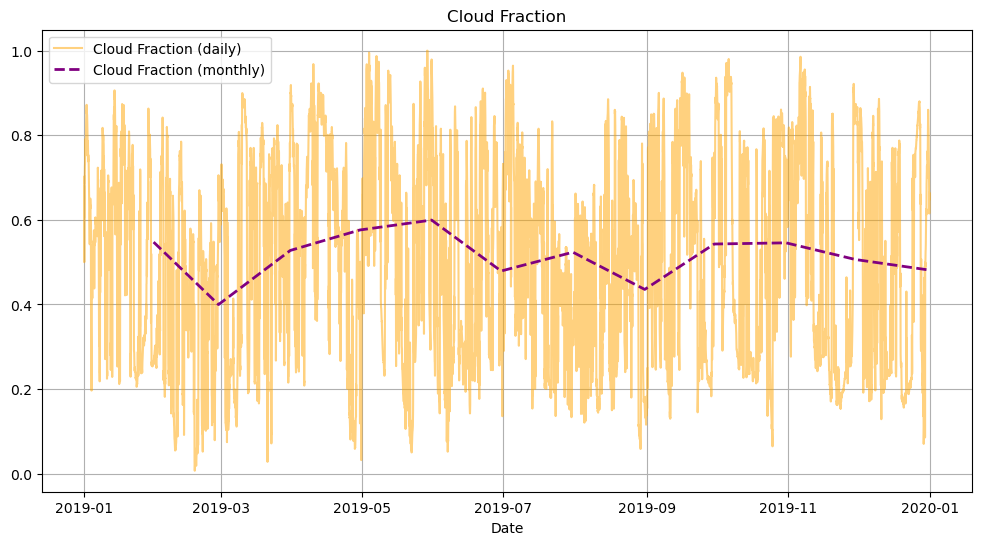

In [43]:
# Calculate the monthly mean of the constrained difference
monthly_mean = cloud_fraction.resample('ME').mean()

# Plot the constrained difference and the monthly mean
plt.figure(figsize=(12, 6))
plt.plot(df.index, cloud_fraction, label="Cloud Fraction (daily)", color="orange", alpha =0.5)
plt.plot(monthly_mean.index, monthly_mean, label="Cloud Fraction (monthly)", color="purple", linestyle="--", linewidth=2)

# Add labels and legend
plt.title("Cloud Fraction")
plt.xlabel("Date")
#plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

here you can see that the values are quite realistic: https://www.researchgate.net/figure/Annual-cycle-of-cloud-fraction-from-surface-based-observations-H95-and-satellite_fig1_249611543 . Maybe it is a bit lower than expected.